In [1]:
from schema import *
import matplotlib.pyplot as plt
import networkx as nx
from typing import List, Dict, Tuple, Any

c:\Users\svoelkl\source\repos\Studium\02. Symbolische KI\Catastrophe-Simulator\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
environment: EnvironmentModel = EnvironmentModel(
    width=10, height=10, n_survivors=5, n_agents=2, n_save_zones=4, seed=None
)

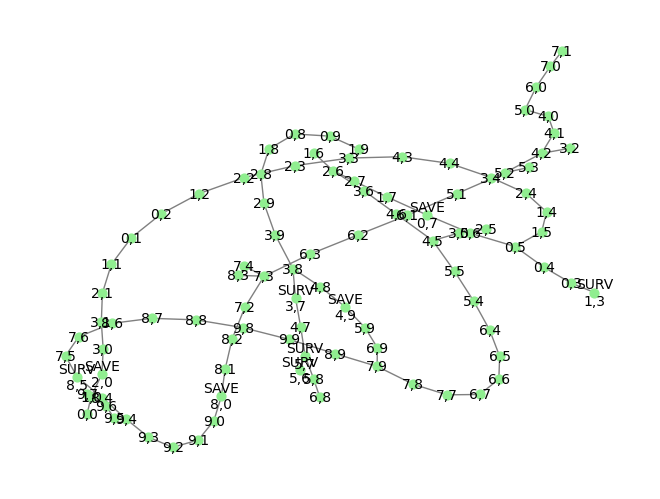

In [3]:
environment.visualize_graph()